In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import phyre
import torch
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING) 

In [2]:
tier = 'ball'
eval_setup = 'ball_within_template'
fold_id = 0
random.seed(0)

### 1. Initialize the  Simulation Cache

In [3]:
train, dev, test = phyre.get_fold(eval_setup, fold_id)
print('Size of resulting splits:\n train:', len(train), '\n dev:',
      len(dev), '\n test:', len(test))

Size of resulting splits:
 train: 1600 
 dev: 400 
 test: 500


In [4]:
cache = phyre.get_default_100k_cache(tier)
print('cache.action_array shape:', cache.action_array.shape)

cache.action_array shape: (100000, 3)


### 2. Initialize the DQN Agent

In [5]:
from dqn import DQNAgent

DEBUG:root:test


In [6]:
agent = DQNAgent()

### 3. Train the Agent

In [ ]:
state, statistic = agent.train(cache, train, tier, dev)

INFO:root:Preprocess the training data
INFO:root:Train set: size=117005756, solved_ratio=1.71%
INFO:root:Create evaluation data from train & dev
INFO:root:Start initializing the Model
INFO:root:Start Training the Model
/home/mynsng/anaconda3/envs/phyre/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
DEBUG:root:Iter: 1000, examples: 16000, mean loss: 0.026409, speed: 2.2 batch/sec, lr: 0.000300
DEBUG:root:Iter: 2000, examples: 32000, mean loss: 0.014492, speed: 2.2 batch/sec, lr: 0.000300
DEBUG:root:Iter: 3000, examples: 48000, mean loss: 0.012294, speed: 2.3 batch/sec, lr: 0.000300
DEBUG:root:Iter: 4000, examples: 64000, mean loss: 0.010877, speed: 2.3 batch/sec, lr: 0.000300
DEBUG:root:Iter: 5000, examples: 80000, mean loss: 0.010121, speed: 2.3 batch/sec, lr: 0.000300
DEBUG:root:Iter: 6000, examples: 96000, mean loss: 0.009143, speed: 2.2 batc

In [8]:
#num = -2:

max_loss = statistic['max_loss']
print(max_loss[-10:])
min_loss = statistic['min_loss']
print(min_loss[-10:])
mean_loss = statistic['mean_loss']
print(mean_loss[-10:])
max_loss_index= statistic['max_loss_index']
print(max_loss_index[-10:])
min_loss_index= statistic['min_loss_index']
print(min_loss_index[-10:]) 
max_loss_action = statistic['max_loss_action']
print(max_loss_action[-10:])
min_loss_action = statistic['min_loss_action']
print(min_loss_action[-10:])
loss_var = statistic['loss_var']
print(loss_var[-10:])

i=3
a = min_loss_index[-10:][i].item()
b = min_loss_action[-10:][i].cpu().numpy()

print(a, b)

[0.11871492862701416, 0.10747554898262024, 0.11558856815099716, 0.16413947939872742, 0.08616632223129272, 0.11439981311559677, 0.14311844110488892, 0.10572715103626251, 0.10618647187948227, 0.11047877371311188]
[0.026330694556236267, 0.00966180395334959, 0.02722158469259739, 0.03165106475353241, 0.025204909965395927, 0.03111783042550087, 0.02003008872270584, 0.03446061909198761, 0.030910052359104156, 0.030569961294531822]
[0.07270440459251404, 0.06121261417865753, 0.06529867649078369, 0.08116455376148224, 0.058268316090106964, 0.06771668046712875, 0.056939322501420975, 0.06230926513671875, 0.05956437811255455, 0.0685252994298935]
[tensor(1049), tensor(112), tensor(67), tensor(299), tensor(200), tensor(204), tensor(275), tensor(80), tensor(219), tensor(714)]
[tensor(1036), tensor(1053), tensor(1384), tensor(345), tensor(1411), tensor(1215), tensor(326), tensor(1060), tensor(1212), tensor(1521)]
[tensor([0.7416, 0.7810, 0.2909], device='cuda:0'), tensor([0.6063, 0.7914, 0.5160], device='

### Visualize

In [9]:
task_ids = [train[a]]
action = b
images, predict_images = agent.predict_qa(state, task_ids, tier, action)

> /home/mynsng/phyre-graph/neural_model.py(259)predict_qa()
-> obs_predict = np.zeros((16, 256, 256), dtype = int)


(Pdb)  c


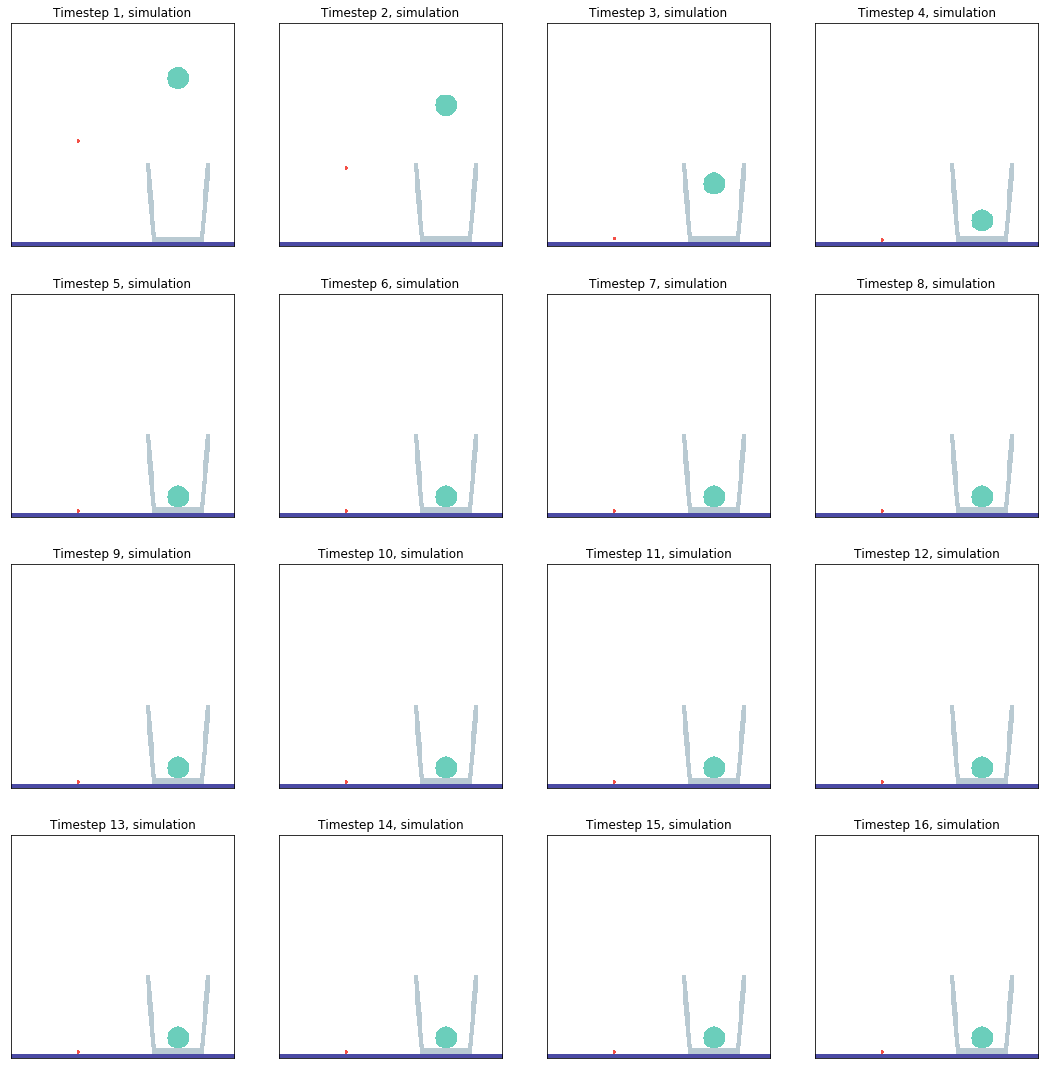

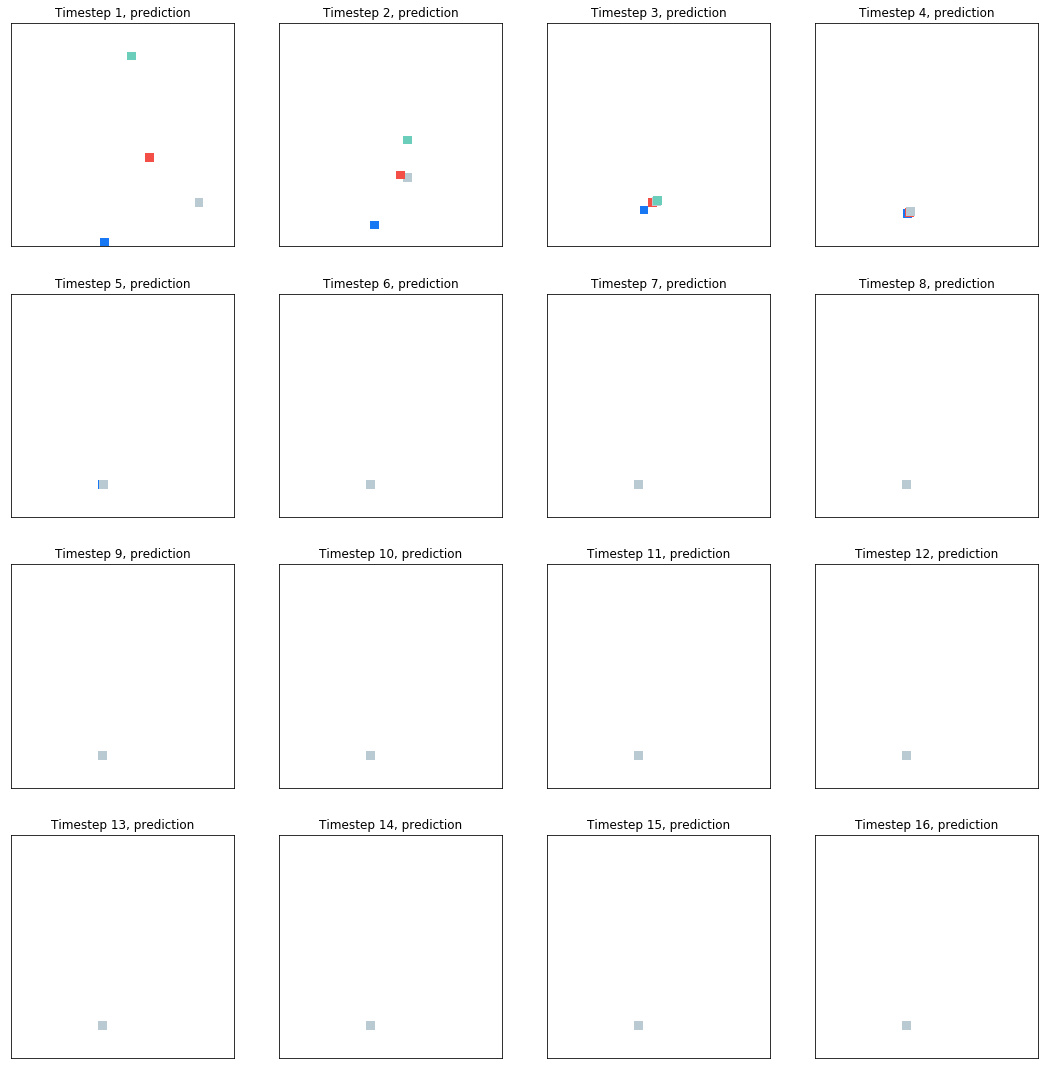

In [10]:
# plot할 개수 설정
fig1, axs1 = plt.subplots(4, 4, figsize=(15, 15))
fig1.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)

fig2, axs2 = plt.subplots(4, 4, figsize=(15, 15))
fig2.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)

# plot 해보리기~~
for i, (ax, image) in enumerate(zip(axs1.flatten(), images)):
    # Convert the simulation observation to images.
    img = phyre.observations_to_float_rgb(image)
    ax.imshow(img)
    
    ax.title.set_text(f'Timestep {i+1}, simulation')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    
for i, (ax, image) in enumerate(zip(axs2.flatten(), predict_images)):
    # Convert the simulation observation to images.
    img = phyre.observations_to_float_rgb(image)
    ax.imshow(img)
    
    ax.title.set_text(f'Timestep {i+1}, prediction')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

### 4. Evaluate the Agent

#### 4.1 Percentage of solved tasks per number of attempts

#### 4.2 AUCESS